# Cloth Type Classifier

This project classifies the type of cloth from the given image. The model is trained using the Fashion-MNIST data set.

The main features of the project are: 
1. It analyses different layer Neural-Networks for the models and choses the most optimal model.
2. After choosing the structure, model optimized by checking the accuracy for different learning rates (with exponential decay)
3. The we try to use different optimizers for the model and see how they perform. 
4. All the analysis is done by using line plots.

Import libraries

In [55]:
%tensorflow_version 2.x  
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import History

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
#class names for the data_set
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Importing the data set and distributing it in training set and test set

In [56]:
fashion_mnist = keras.datasets.fashion_mnist
(train_set, train_labels), (test_set, test_labels) = fashion_mnist.load_data()

Normalizing the pixel value to keep them between 0 and 1

In [57]:
train_set = train_set/255
test_set = test_set/255

**Building the neural network** 

**model 1**
*   Layer 1 consists of 128 perceptrons with activation function as "relu"
*   Layer 2 i.e the output layer consists of 10 output neurons as there are 10 classes in the dataset. The activation function used in this layer is "softmax". 

**model 2**
*   Layer 1 consists of 128 perceptrons with activation function as "relu"
*   Layer 2 consists of 64 perceptrons with activation function as "relu"
*   Layer 3 i.e the output layer consists of 10 output neurons as there are 10 classes in the dataset. The activation function used in this layer is "softmax". 

**model 3**
*   Layer 1 consists of 128 perceptrons with activation function as "relu"
*   Layer 2 consists of 64 perceptrons with activation function as "relu"
*   Layer 3 consists of 32 perceptrons with activation function as "relu"
*   Layer 2 i.e the output layer consists of 10 output neurons as there are 10 classes in the dataset. The activation function used in this layer is "softmax". 

**Aim :**
To see whether making the neural network deeper improves the performance of the model or not

In [70]:
model1 = keras.Sequential([
                          layers.Flatten(input_shape=(28,28)),
                          layers.Dense(128, activation='relu'),
                          layers.Dense(10, activation='softmax')              
])

model2 = keras.Sequential([
                           layers.Flatten(input_shape=(28, 28)),
                           layers.Dense(128, activation='relu'),
                           layers.Dense(64, activation='relu'),
                           layers.Dense(10, activation='softmax')
])

model3 = keras.Sequential([
                           layers.Flatten(input_shape=(28, 28)),
                           layers.Dense(128, activation='relu'),
                           layers.Dense(64, activation='relu'),
                           layers.Dense(32, activation='relu'),
                           layers.Dense(10, activation='softmax')
])

In [77]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.0003,
    decay_steps=1000,
    decay_rate=0.9)


In [78]:
opt = keras.optimizers.Adam(learning_rate=lr_schedule)
model1.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
opt = keras.optimizers.Adam(learning_rate=lr_schedule)
model2.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
opt = keras.optimizers.Adam(learning_rate=lr_schedule)
model3.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [82]:
#fit data in each model and save the history object in info1, info2 and info3
info1 = model1.fit(train_set, train_labels, epochs=10, batch_size=32, validation_split=0.1, verbose=0)
info2 = model2.fit(train_set, train_labels, epochs=10, batch_size=32, validation_split=0.1, verbose=0)
info3 = model3.fit(train_set, train_labels, epochs=10, batch_size=32, validation_split=0.1, verbose=0);

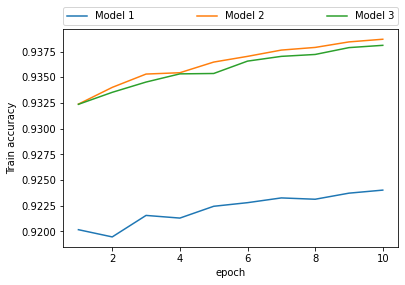

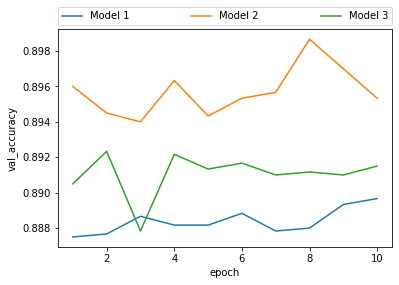

In [83]:
epoch = [x for x in range(1, 11)]
# plt.subplot(1,2, 1)
plt.xlabel('epoch')
plt.ylabel('Train accuracy')
plt.plot(epoch, info1.history['accuracy'], label='Model 1')
plt.plot( epoch, info2.history['accuracy'], label='Model 2')
plt.plot(epoch, info3.history['accuracy'], label='Model 3')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0.)
plt.show()

epoch = [x for x in range(1, 11)]
# plt.subplot(1, 2, 2)
plt.xlabel('epoch')
plt.ylabel('val_accuracy')
plt.plot(epoch, info1.history['val_accuracy'], label='Model 1')
plt.plot( epoch, info2.history['val_accuracy'], label='Model 2')
plt.plot(epoch, info3.history['val_accuracy'], label='Model 3')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0.);
plt.show()

# max1_train_acc = max(info1.history['accuracy'])
# max2_train_acc = max(info2.history['accuracy'])
# max3_train_acc = max(info3.history['accuracy'])



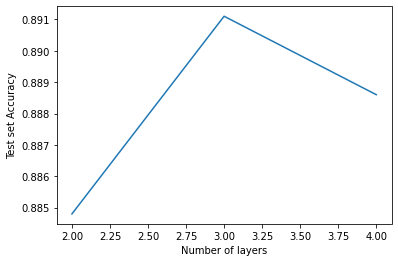

In [84]:
test_loss1, test_acc1 = model1.evaluate(test_set, test_labels, verbose=0)
test_loss2, test_acc2 = model2.evaluate(test_set, test_labels, verbose=0)
test_loss3, test_acc3 = model3.evaluate(test_set, test_labels, verbose=0)

plt.xlabel("Number of layers")
plt.ylabel("Test set Accuracy")
number_of_layers= [2, 3, 4]
test_acc = [test_acc1, test_acc2, test_acc3]
plt.plot(number_of_layers, test_acc);

From the above analysis we can see that:
*  The most appropriate number of layers is 3 which is used in model 2.



So we select the Model 2 for further analysis and set the epoch number to 2 for this model. We keep other parameters like batch_size(i.e. the mini-batch size), validation data split size same.

Now that we have selected the structure of the model let's optimize our hyper parameters like
1. Learning rate
2. Batch size
3. epoch

In [17]:
lr_schedule = list()
learning_rates = np.arange(0.0005, 0.005, 0.0005)
for x in learning_rates:
  sch = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=x, decay_steps=1000, decay_rate=0.96)
  lr_schedule.append(sch)

total_info = list()
total_test_info = list()
for sch in lr_schedule:
  model2 = keras.Sequential([
                           layers.Flatten(input_shape=(28, 28)),
                           layers.Dense(128, activation='relu'),
                           layers.Dense(64, activation='relu'),
                           layers.Dense(10, activation='softmax')
  ])
  opt = keras.optimizers.Adam(learning_rate=lr_schedule)
  model2.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  info2 = model2.fit(train_set, train_labels, epochs=10, batch_size=32, validation_split=0.1, verbose=0)
  total_info.append(info2)
  test_loss2, test_acc2 = model2.evaluate(test_set, test_labels, verbose=0)
  total_test_info.append(test_acc2)

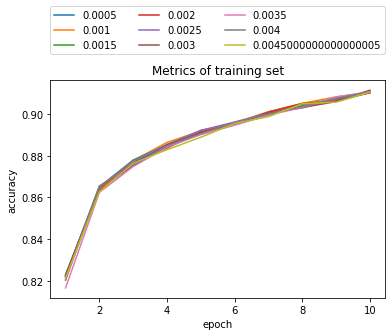

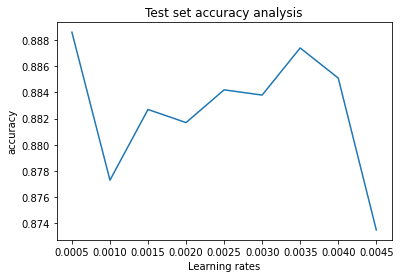

In [46]:

epoch = [x for x in range(1, 11)]
plt.xlabel('epoch')
plt.ylabel('accuracy')
for (info,rate) in zip(total_info, learning_rates):
  plt.plot(epoch, info.history['accuracy'], label=str(rate))

plt.legend(bbox_to_anchor=(0., 1.12, 1., .102), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0.)
plt.title('Metrics of training set')
plt.show()

plt.xlabel('Learning rates')
plt.ylabel('accuracy')
plt.plot(learning_rates, total_test_info)
plt.title('Test set accuracy analysis');

For the range that we chose to check for learning rate, we can see the test-set accuracy peaks for the learning rate 0.0005.
So lets choose learning rate = 0.0005 for further analysis.


Let's now use some other optimizer instead of Adam. The two optimizers we are going to use: <br>
1. SGD, Stochastic Gradient Descent
2. RMSProp, Root Mean Square Propagation


In [19]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.0005,
    decay_steps=1000,
    decay_rate=0.95)

**Model with RMSProp as optimizers**

In [37]:
modelprop = keras.Sequential([
                           layers.Flatten(input_shape=(28, 28)),
                           layers.Dense(128, activation='relu'),
                           layers.Dense(64, activation='relu'),
                           layers.Dense(10, activation='softmax')
])

modelprop.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=lr_schedule),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

**Model with Stochastic Gradien Descent as optimizer**

In [38]:
modelsgd = keras.Sequential([
                           layers.Flatten(input_shape=(28, 28)),
                           layers.Dense(128, activation='relu'),
                           layers.Dense(64, activation='relu'),
                           layers.Dense(10, activation='softmax')
])

modelsgd.compile(
    optimizer=keras.optimizers.SGD(learning_rate=lr_schedule),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

**Model with Adam optimizer**

In [39]:
modeladam = keras.Sequential([
                           layers.Flatten(input_shape=(28, 28)),
                           layers.Dense(128, activation='relu'),
                           layers.Dense(64, activation='relu'),
                           layers.Dense(10, activation='softmax')
])

modeladam.compile(
    optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [40]:
sgdhist = modelsgd.fit(train_set, train_labels, epochs=10, batch_size=32, validation_split=0.1, verbose=0)
prophist = modelprop.fit(train_set, train_labels, epochs=10, batch_size=32, validation_split=0.1, verbose=0)
adamhist = modeladam.fit(train_set, train_labels, epochs=10, batch_size=32, validation_split=0.1, verbose=0)

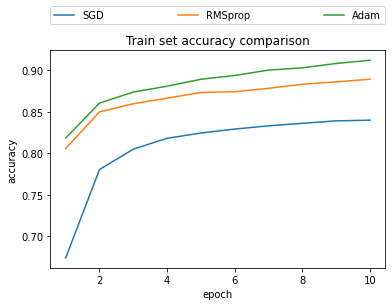

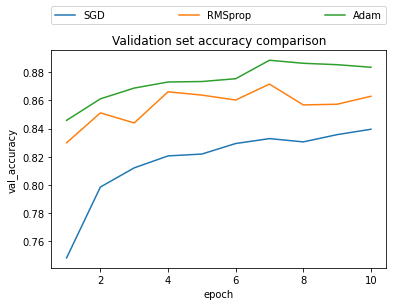

In [47]:
plt.title('Train set accuracy comparison')
plt.ylabel('accuracy')
plt.xlabel('epoch')

num_epoch = [x for x in range(1,11)]
plt.plot(num_epoch, sgdhist.history['accuracy'], label='SGD')
plt.plot(num_epoch, prophist.history['accuracy'], label='RMSprop')
plt.plot(num_epoch, adamhist.history['accuracy'], label='Adam')

plt.legend(bbox_to_anchor=(0., 1.12, 1., .102), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0.)
plt.show()

plt.title('Validation set accuracy comparison')
plt.ylabel('val_accuracy')
plt.xlabel('epoch')

num_epoch = [x for x in range(1,11)]
plt.plot(num_epoch, sgdhist.history['val_accuracy'], label='SGD')
plt.plot(num_epoch, prophist.history['val_accuracy'], label='RMSprop')
plt.plot(num_epoch, adamhist.history['val_accuracy'], label='Adam')

plt.legend(bbox_to_anchor=(0., 1.12, 1., .102), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0.)
plt.show();



In [49]:
test_loss_adam, test_acc_adam = modeladam.evaluate(test_set, test_labels, verbose=0)
test_loss_rmsprop, test_acc_rmsprop = modelprop.evaluate(test_set, test_labels, verbose=0)
test_loss_sgd, test_acc_sgd = modelsgd.evaluate(test_set, test_labels, verbose=0)

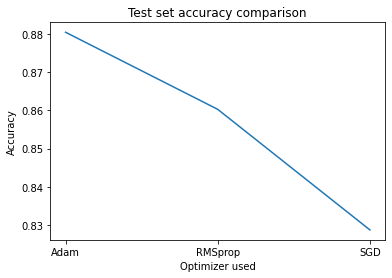

In [52]:
plt.title('Test set accuracy comparison')
plt.xlabel('Optimizer used')
plt.ylabel('Accuracy')

acc = [test_acc_adam, test_acc_rmsprop, test_acc_sgd]
opt = ['Adam', 'RMSprop', 'SGD']
plt.plot(opt, acc)

plt.show()

From the above analysis we can see that for the chosen hyperparameters the model using **Adam** optimizer performs better.


**Summary** <br>
1. The project started off with analysing the number of layers that would be optimal for the prediction of **Clothing** that is present in the image.
2. Then we chose the optimal learning rate for our model by analysing the train, validation and test set accuracy for the chosen neural network in range **0.005 to 0.0005 with a step size of 0.0005**. 
3. After choosing the learning rate we tried to analyse the performance of different optimizers i.e. **Adam, RMSprop, and SGD**

The project analyses different machine learning approaches for bulding a neural network model. The analysis is performed using different line-plots throughout the project.